# Install dependancies

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

# Import necessary libraries

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import VotingClassifier
import warnings

warnings.filterwarnings('ignore')

# Load the dataset

In [59]:
np.random.seed(42)

# Since header is missing in the csv file
column_names = [
    'Patient ID', 'Month of Birth', 'Age', 'Sex', 'Occupation', 'T Stage', 'N Stage',
    '6th Stage', 'Differentiated', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
    'Progesterone Status', 'Regional Node Examined', 'Regional Node Positive',
    'Survival Months', 'Mortality Status'
]
data = pd.read_csv('Document 2.csv', names=column_names, header=0)
print('Initial Data Shape:', data.shape)
print(data.head())
data

Initial Data Shape: (4024, 18)
  Patient ID  Month of Birth   Age     Sex   Occupation T Stage N Stage  \
0      A0012              12  68.0  Female     Teaching      T1      N1   
1      A0013              12  50.0  Female      Medical      T2      N2   
2      A0014              11  58.0  Female  Engineering      T3      N3   
3      A0015               3  58.0  Female   Technology      T1      N1   
4      A0016               1  47.0  Female   Multimedia      T2      N1   

  6th Stage             Differentiated  Grade   A Stage  Tumor Size  \
0       IIA      Poorly differentiated      3  Regional         4.0   
1      IIIA  Moderately differentiated      2  Regional        35.0   
2      IIIC  Moderately differentiated      2  Regional        63.0   
3       IIA      Poorly differentiated      3  Regional        18.0   
4       IIB      Poorly differentiated      3  Regional        41.0   

  Estrogen Status Progesterone Status  Regional Node Examined  \
0        Positive         

,Patient ID,Month of Birth,Age,Sex,Occupation,T Stage,N Stage,6th Stage,Differentiated,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Mortality Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,A4031,1,62.0,Female,NaN,T1,N1,IIA,Moderately differentiated,2,Regional,9.0,Positive,Positive,1.0,1,49,Alive
4020,A4032,5,56.0,Female,NaN,T2,N2,IIIA,Moderately differentiated,2,Regional,46.0,Positive,Positive,14.0,8,69,Alive
4021,A4033,2,68.0,1,NaN,T2,N1,IIB,Moderately differentiated,2,Regional,22.0,Positive,Negative,11.0,3,69,Alive
4022,A4034,10,58.0,Female,NaN,T2,N1,IIB,Moderately differentiated,2,Regional,44.0,Positive,Positive,11.0,1,72,Alive


# ------------ Case Study (A): Predicting Cancer Patients’ Mortality Status ------------

## Task 1: Domain Understanding - Variable Retention/Dropping
### This is documented in the report, not coded here. Variables to retain/drop are decided based on relevance to mortality prediction.

## Task 2: Exploring and Understanding Your Dataset


Descriptive Statistics for Retained Variables:
                Age     Sex T Stage N Stage 6th Stage  \
count   4015.000000    4020    4024    4024      4024   
unique          NaN       2       4       3         5   
top             NaN  female      t2      n1       iia   
freq            NaN    4001    1786    2732      1305   
mean      54.107098     NaN     NaN     NaN       NaN   
std       11.715528     NaN     NaN     NaN       NaN   
min      -50.000000     NaN     NaN     NaN       NaN   
25%       47.000000     NaN     NaN     NaN       NaN   
50%       54.000000     NaN     NaN     NaN       NaN   
75%       61.000000     NaN     NaN     NaN       NaN   
max      502.000000     NaN     NaN     NaN       NaN   

                   Differentiated        Grade   A Stage   Tumor Size  \
count                        4024  4024.000000      4024  4021.000000   
unique                          4          NaN         2          NaN   
top     moderately differentiated          NaN  

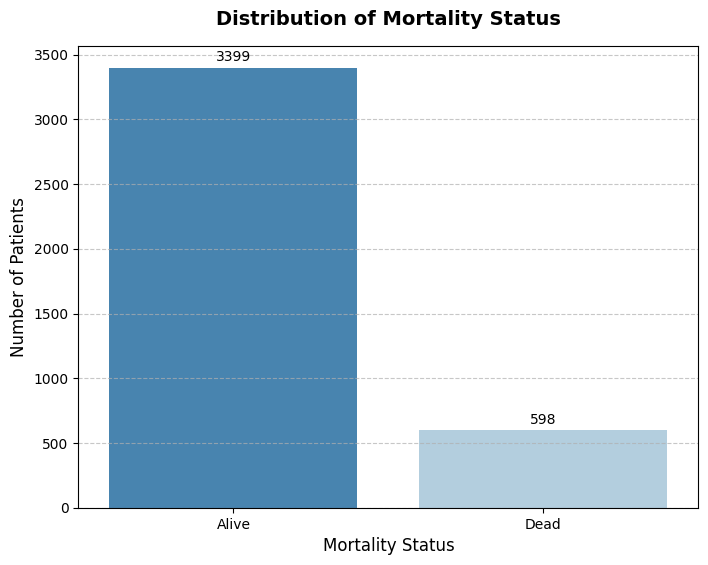

In [60]:
retained_columns = [
    'Age', 'Sex', 'T Stage', 'N Stage', '6th Stage', 'Differentiated', 'Grade',
    'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
    'Regional Node Examined', 'Regional Node Positive', 'Mortality Status'
]
data_retained = data[retained_columns]

numeric_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive']
for col in numeric_cols:
    data_retained[col] = pd.to_numeric(data_retained[col], errors='coerce')

categorical_cols = ['Sex', 'T Stage', 'N Stage', '6th Stage', 'Differentiated', 'Grade',
                    'A Stage', 'Estrogen Status', 'Progesterone Status']
for col in categorical_cols:
    if data_retained[col].dtype == 'object':
        data_retained[col] = data_retained[col].str.strip().str.lower()

data_retained['T Stage'] = data_retained['T Stage'].replace({'t1a': 't1', 't1b': 't1', 't2a': 't2', 't2b': 't2',
                                                             't3a': 't3', 't3b': 't3', 't4a': 't4', 't4b': 't4'})

print('\nDescriptive Statistics for Retained Variables:')
print(data_retained.describe(include='all'))

print('\nVariable Scale Types:')
for col in data_retained.columns:
    print(f'{col}: {data_retained[col].dtype}')

plt.figure(figsize=(8, 6))
sns.countplot(x='Mortality Status', data=data_retained, palette='Blues_r', order=['Alive', 'Dead'])
plt.title('Distribution of Mortality Status', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Mortality Status', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Alive', 'Dead'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(data_retained['Mortality Status'].value_counts().loc[['Alive', 'Dead']].values):
    plt.text(i, v + 50, str(v), color='black', ha='center', fontsize=10)
plt.savefig('mortality_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Task 3: Data Preparation - Cleaning and Transforming


### 3a: Identify issues (e.g., missing values, categorical encoding needed)

In [61]:
print('\nMissing Values Before Imputation:')
print(data_retained.isnull().sum())


Missing Values Before Imputation:
Age                       9
Sex                       4
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiated            0
Grade                     0
A Stage                   0
Tumor Size                3
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    1
Regional Node Positive    0
Mortality Status          0
dtype: int64


### 3b: Implement fixes

In [62]:

data_retained['Mortality Status'] = data_retained['Mortality Status'].str.lower().replace({
    'alive': 'Alive', 'dead': 'Dead'
}).fillna('Unknown')
data_retained = data_retained[data_retained['Mortality Status'].isin(['Alive', 'Dead'])]

print('\nMissing Values Before Imputation:')
print(data_retained.isnull().sum())
# Imputation
data_cleaned = data_retained.copy()
for col in numeric_cols:
    if data_cleaned[col].isnull().all():
        print(f'Warning: {col} is entirely NaN. Imputing with median from full dataset.')
        data_cleaned[col].fillna(0, inplace=True) 
    else:
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

for col in categorical_cols:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

print('\nMissing Values After Imputation:')
print(data_cleaned.isnull().sum())
#encoding
le_encoders = {}
for col in categorical_cols + ['Mortality Status']:
    le_encoders[col] = LabelEncoder()
    data_cleaned[col] = le_encoders[col].fit_transform(data_cleaned[col])

data_cleaned['Tumor Size'] = data_cleaned['Tumor Size'].clip(upper=200)

scaler = StandardScaler()
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

X = data_cleaned.drop('Mortality Status', axis=1)
y = data_cleaned['Mortality Status']
print('\nFeatures Used for Classification:')
print(X.columns.tolist())
print('\nData Shape:', X.shape)

print('\nDescriptive Statistics for cleaned Retained Variables:')
print(data_cleaned.describe(include='all'))


Missing Values Before Imputation:
Age                       9
Sex                       4
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiated            0
Grade                     0
A Stage                   0
Tumor Size                3
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    1
Regional Node Positive    0
Mortality Status          0
dtype: int64

Missing Values After Imputation:
Age                       0
Sex                       0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiated            0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Mortality Status          0
dtype: int64

Features Used for Classification:
['Age', 'Sex', 'T Stage', 'N Stage', '6th Stage', 'Differentiated', 'Grade', 'A Stage'

## Task 4: Classification Modelling


## 4a: Algorithm types and parameters
### Documented in report:
- NB: Non-parametric, no learnable parameters, hyperparameter: var_smoothing
- LR: Parametric, learnable parameters: weights, intercept, hyperparameters: C, solver
- KNN: Non-parametric, no learnable parameters, hyperparameters: n_neighbors, weights

## 4b: Train-test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('\nTrain Labels Ratio:', y_train.value_counts(normalize=True))
print('Test Labels Ratio:', y_test.value_counts(normalize=True))

print('\nNaN Check in X_train:')
print(X_train.isnull().sum())
print('\nNaN Check in y_train:')
print(y_train.isnull().sum())
#training models
nb = GaussianNB()
lr = LogisticRegression(random_state=42, max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)

nb.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)


Train Labels Ratio: Mortality Status
0    0.846847
1    0.153153
Name: proportion, dtype: float64
Test Labels Ratio: Mortality Status
0    0.847205
1    0.152795
Name: proportion, dtype: float64

NaN Check in X_train:
Age                       0
Sex                       0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiated            0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
dtype: int64

NaN Check in y_train:
0


KNeighborsClassifier()

## Task 5: Evaluating Classification Models
### 5a: Confusion matrix, classification report, AUC-ROC


Naive Bayes - Confusion Matrix:
[[578 104]
 [ 77  46]]


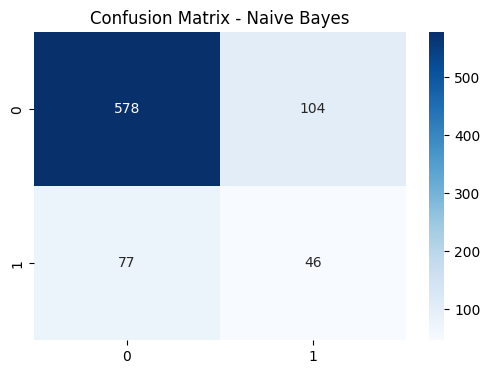


Naive Bayes - Classification Report:
              precision    recall  f1-score   support

       Alive       0.88      0.85      0.86       682
        Dead       0.31      0.37      0.34       123

    accuracy                           0.78       805
   macro avg       0.59      0.61      0.60       805
weighted avg       0.79      0.78      0.78       805



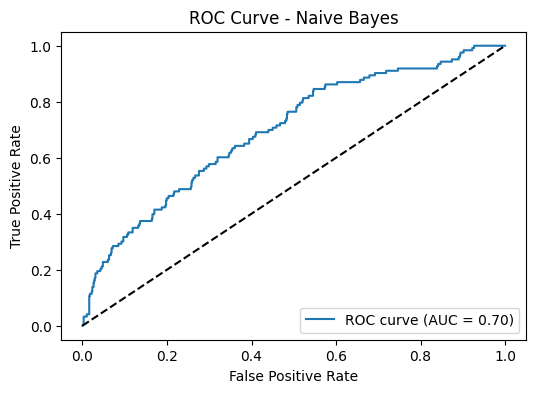


Logistic Regression - Confusion Matrix:
[[673   9]
 [108  15]]


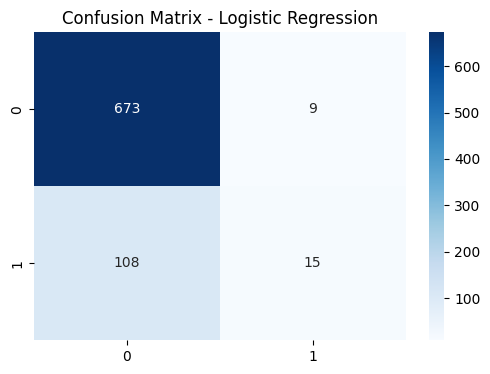


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       Alive       0.86      0.99      0.92       682
        Dead       0.62      0.12      0.20       123

    accuracy                           0.85       805
   macro avg       0.74      0.55      0.56       805
weighted avg       0.83      0.85      0.81       805



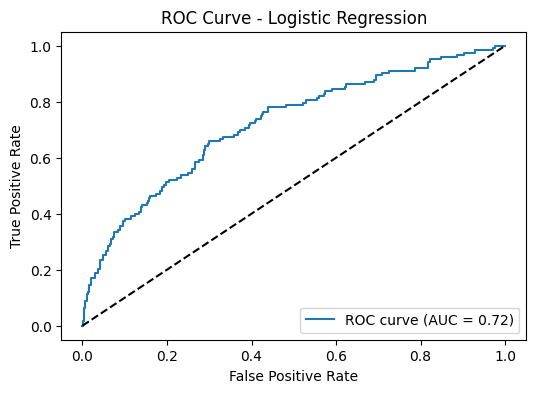


KNN (K=5) - Confusion Matrix:
[[655  27]
 [105  18]]


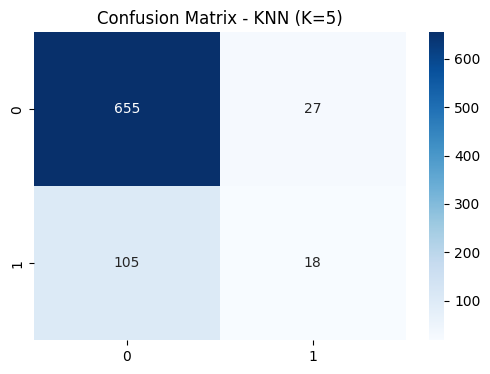


KNN (K=5) - Classification Report:
              precision    recall  f1-score   support

       Alive       0.86      0.96      0.91       682
        Dead       0.40      0.15      0.21       123

    accuracy                           0.84       805
   macro avg       0.63      0.55      0.56       805
weighted avg       0.79      0.84      0.80       805



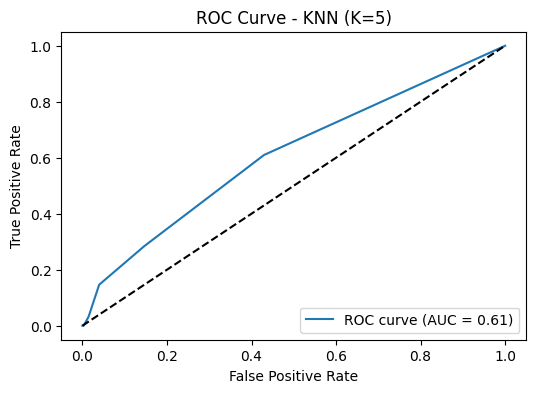

In [64]:
models = {'Naive Bayes': nb, 'Logistic Regression': lr, 'KNN (K=5)': knn}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'\n{name} - Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'cm_{name.lower().replace(" ", "_")}.png')
    plt.show()

    print(f'\n{name} - Classification Report:')
    print(classification_report(y_test, y_pred, target_names=le_encoders['Mortality Status'].classes_))

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.savefig(f'roc_{name.lower().replace(" ", "_")}.png')
    plt.show()

## 5b: Evaluation metrics (documented in report)
## 5c: Select best model based on AUC-ROC and Recall for 'Dead' class
LR is best based on higher AUC-ROC and Recall

## 5d: Hyperparameter tuning for best model (Logistic Regression)


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Tuned Logistic Regression - Confusion Matrix:
[[674   8]
 [109  14]]


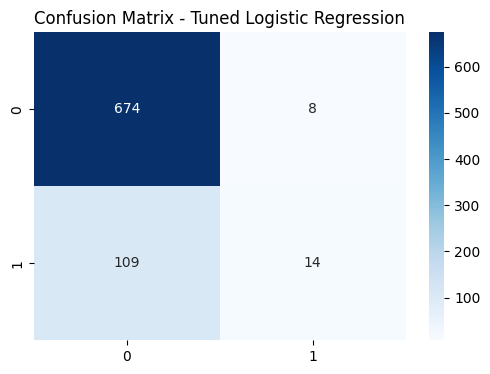


Tuned Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       Alive       0.86      0.99      0.92       682
        Dead       0.64      0.11      0.19       123

    accuracy                           0.85       805
   macro avg       0.75      0.55      0.56       805
weighted avg       0.83      0.85      0.81       805



In [65]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('\nBest Hyperparameters for Logistic Regression:', grid_search.best_params_)

lr_tuned = grid_search.best_estimator_
y_pred_tuned = lr_tuned.predict(X_test)
print('\nTuned Logistic Regression - Confusion Matrix:')
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.savefig('cm_lr_tuned.png')
plt.show()

print('\nTuned Logistic Regression - Classification Report:')
print(classification_report(y_test, y_pred_tuned, target_names=le_encoders['Mortality Status'].classes_))

## 5e: Criticism and ethical issues (documented in report)

## 5f: Voting ensemble classifier


Voting Ensemble - Confusion Matrix:
[[589  93]
 [ 79  44]]


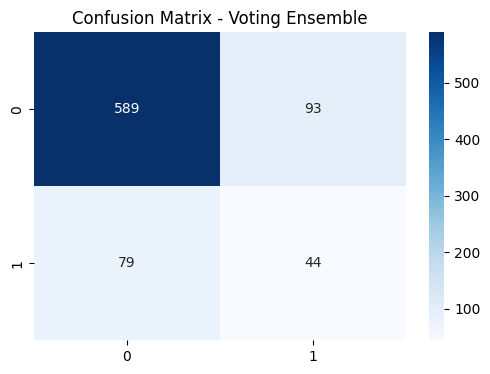


Voting Ensemble - Classification Report:
              precision    recall  f1-score   support

       Alive       0.88      0.86      0.87       682
        Dead       0.32      0.36      0.34       123

    accuracy                           0.79       805
   macro avg       0.60      0.61      0.61       805
weighted avg       0.80      0.79      0.79       805



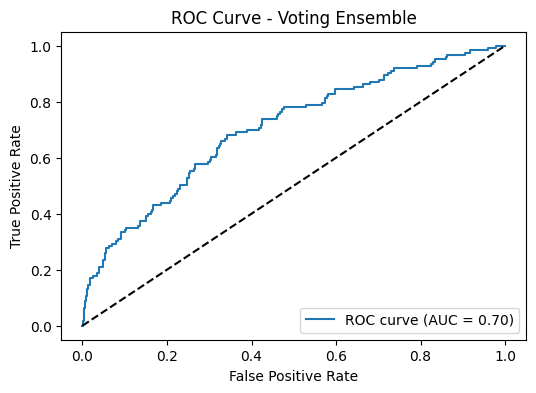

In [66]:
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('nb', GaussianNB())
], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
print('\nVoting Ensemble - Confusion Matrix:')
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print(cm_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Ensemble')
plt.savefig('cm_voting_ensemble.png')
plt.show()

print('\nVoting Ensemble - Classification Report:')
print(classification_report(y_test, y_pred_ensemble, target_names=le_encoders['Mortality Status'].classes_))
y_prob_ensemble = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_ensemble)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Ensemble')
plt.legend(loc='lower right')
plt.savefig('roc_voting_ensemble.png')
plt.show()

# ------------ Case Study (B): Predicting Cancer Patients’ Survival Months ------------

## Task 1: Domain Understanding - Regression


In [67]:
data_reg = data[data['Mortality Status'].str.lower() == 'dead'][retained_columns[:-1] + ['Survival Months']]
data_reg['Survival Months'] = pd.to_numeric(data_reg['Survival Months'], errors='coerce')

print('\nRegression Data - Feature Names:', data_reg.columns.tolist())
print('Regression Data Shape:', data_reg.shape)

data_reg_cleaned = data_reg.copy()

for col in numeric_cols:
    data_reg_cleaned[col] = pd.to_numeric(data_reg_cleaned[col], errors='coerce')
    data_reg_cleaned[col].fillna(data_reg_cleaned[col].median(), inplace=True)


for col in categorical_cols:
    if data_reg_cleaned[col].dtype == 'object':
        data_reg_cleaned[col] = data_reg_cleaned[col].str.strip().str.lower()
    data_reg_cleaned[col].fillna(data_reg_cleaned[col].mode()[0], inplace=True)

for col in categorical_cols:
    try:
        data_reg_cleaned[col] = le_encoders[col].transform(data_reg_cleaned[col])
    except ValueError as e:
        print(f'Error encoding {col}: {e}')
        mode_value = data_cleaned[col].mode()[0]
        data_reg_cleaned[col] = data_reg_cleaned[col].map(lambda x: x if x in le_encoders[col].classes_ else le_encoders[col].transform([mode_value])[0])

data_reg_cleaned[numeric_cols] = scaler.transform(data_reg_cleaned[numeric_cols])

print('\nAfter Imputation - Regression Missing Values:')
print(data_reg_cleaned.isnull().sum())

X_reg = data_reg_cleaned.drop('Survival Months', axis=1)
y_reg = data_reg_cleaned['Survival Months']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


Regression Data - Feature Names: ['Age', 'Sex', 'T Stage', 'N Stage', '6th Stage', 'Differentiated', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']
Regression Data Shape: (616, 14)

After Imputation - Regression Missing Values:
Age                       0
Sex                       0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiated            0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
dtype: int64


## Task 2: Modelling - Decision Tree Regression
## 2a: Benefits of DT documented in report
## 2b: Build DT-1 (fully grown) and DT-2 (pruned to 4 levels)

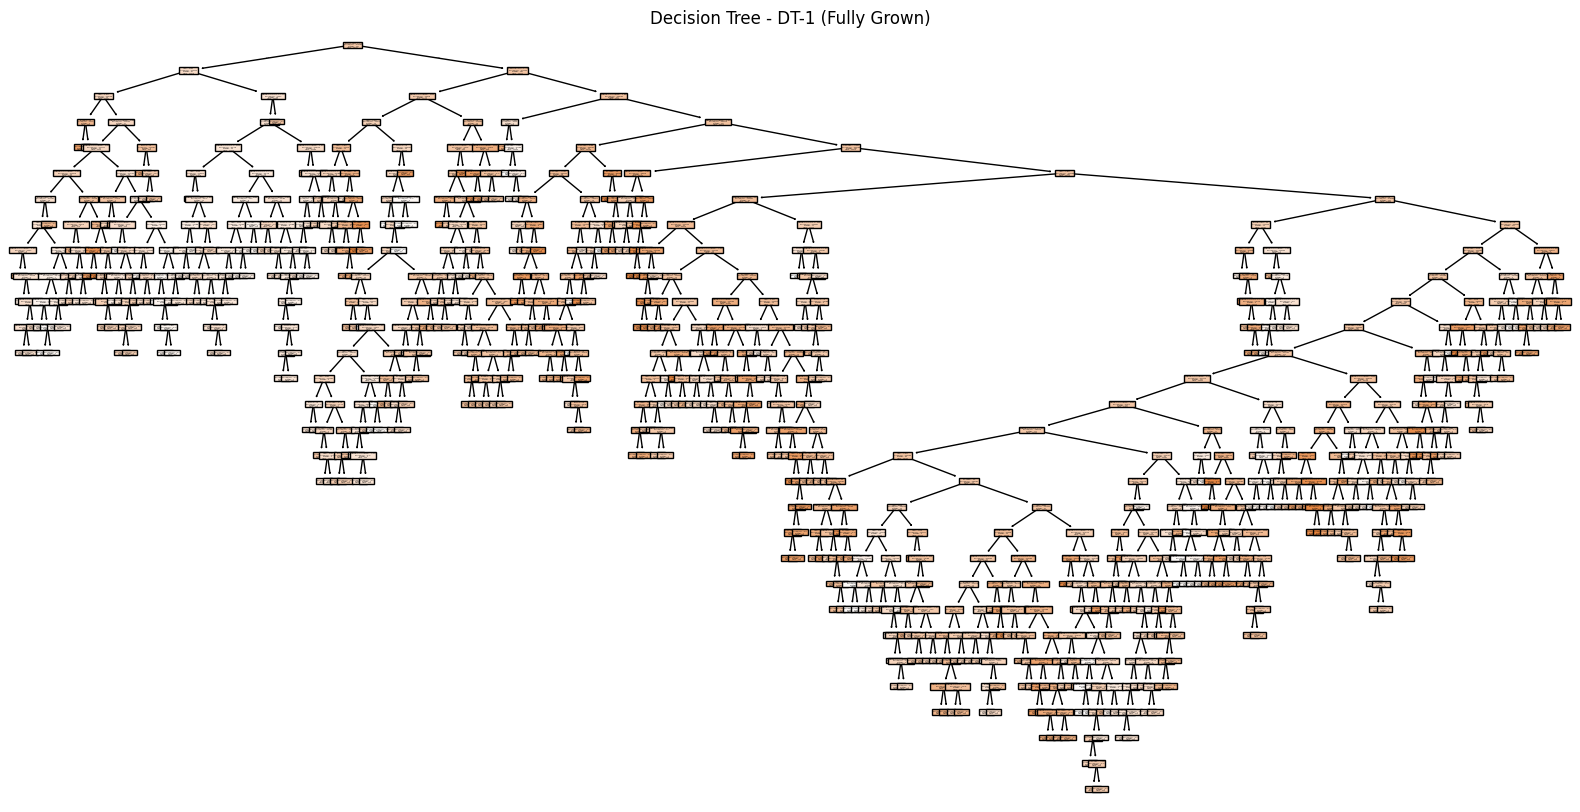

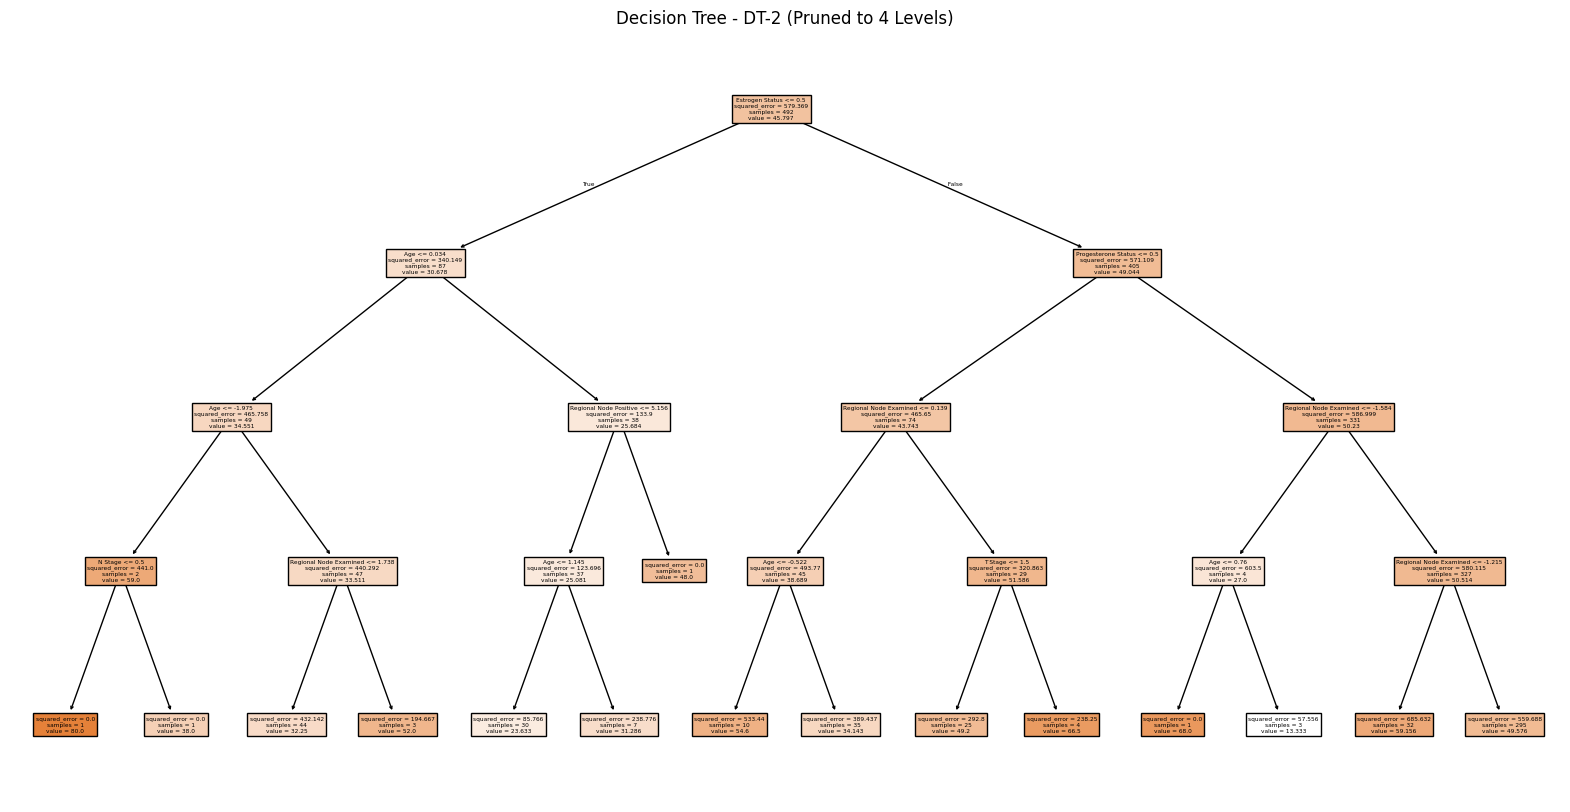

In [68]:
dt1 = DecisionTreeRegressor(random_state=42)
dt2 = DecisionTreeRegressor(max_depth=4, random_state=42)

dt1.fit(X_train_reg, y_train_reg)
dt2.fit(X_train_reg, y_train_reg)

plt.figure(figsize=(20, 10))
plot_tree(dt1, feature_names=X_reg.columns, filled=True)
plt.title('Decision Tree - DT-1 (Fully Grown)')
plt.savefig('dt1_tree.png')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt2, feature_names=X_reg.columns, filled=True)
plt.title('Decision Tree - DT-2 (Pruned to 4 Levels)')
plt.savefig('dt2_tree.png')
plt.show()

## Task 3: Evaluating Regression Models
## 3a: Evaluation metrics

In [69]:
models_reg = {'DT-1 (Fully Grown)': dt1, 'DT-2 (Pruned)': dt2}
for name, model in models_reg.items():
    y_pred_reg = model.predict(X_test_reg)
    print(f'\n{name} - Regression Metrics:')
    print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}')
    print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.2f}')
    print(f'R-Square: {r2_score(y_test_reg, y_pred_reg):.2f}')


DT-1 (Fully Grown) - Regression Metrics:
MSE: 1151.69
MAE: 26.53
R-Square: -1.10

DT-2 (Pruned) - Regression Metrics:
MSE: 592.40
MAE: 19.37
R-Square: -0.08


# 3b: Select best model (documented in report)
# 3c: Concerns about metrics (documented in report)

# Task 4: Interpreting DT Outcomes for Patient B002565
# Patient attributes

In [70]:
# Predict for Patient B002565
patient_b002565 = {
    'Age': 29,
    'Sex': 'female',
    'T Stage': 't3',
    'N Stage': 'n1',
    '6th Stage': 'iiic',
    'Differentiated': 'moderately differentiated',
    'Grade': 2,
    'A Stage': 'regional',
    'Tumor Size': 41,
    'Estrogen Status': 'negative',
    'Progesterone Status': 'positive',
    'Regional Node Examined': 5,
    'Regional Node Positive': 1
}

patient_b_df = pd.DataFrame([patient_b002565])
for col in categorical_cols:
    patient_b_df[col] = le_encoders[col].transform(patient_b_df[col])
patient_b_df[numeric_cols] = scaler.transform(patient_b_df[numeric_cols])

pred_survival = dt2.predict(patient_b_df)
print(f'\nPredicted Survival Months for Patient B002565 using DT-2: {pred_survival[0]:.2f}')


Predicted Survival Months for Patient B002565 using DT-2: 80.00


# Just for verification that all the models work correctly!

In [71]:
#from the csv
patient_a1872 = {
    'Age': 47,
    'Sex': 'female',
    'T Stage': 't1',
    'N Stage': 'n1',
    '6th Stage': 'iia',
    'Differentiated': 'well differentiated',
    'Grade': 1,
    'A Stage': 'regional',
    'Tumor Size': 2,
    'Estrogen Status': 'positive',
    'Progesterone Status': 'positive',
    'Regional Node Examined': 25,
    'Regional Node Positive': 1
}

patient_a_df = pd.DataFrame([patient_a1872])
for col in categorical_cols:
    patient_a_df[col] = le_encoders[col].transform(patient_a_df[col])
patient_a_df[numeric_cols] = scaler.transform(patient_a_df[numeric_cols])

nb_pred = nb.predict(patient_a_df)[0]
lr_pred = lr.predict(patient_a_df)[0]
knn_pred = knn.predict(patient_a_df)[0]
ensemble_pred = voting_clf.predict(patient_a_df)[0]

mortality_map = {0: 'Alive', 1: 'Dead'}
print(f'\nPrediction for Patient A1872:')
print(f'Naive Bayes: {mortality_map[nb_pred]}')
print(f'Logistic Regression: {mortality_map[lr_pred]}')
print(f'KNN (K=5): {mortality_map[knn_pred]}')
print(f'Voting Ensemble: {mortality_map[ensemble_pred]}')
print('Actual Status: Alive')


Prediction for Patient A1872:
Naive Bayes: Alive
Logistic Regression: Alive
KNN (K=5): Alive
Voting Ensemble: Alive
Actual Status: Alive
